In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
skill_freq = pd.read_csv("/content/skill_frequency_v1.csv")

skill_freq.head()

,skill,count
0,excel,40025
1,aws,23233
2,git,14815
3,sql,6322
4,python,5274


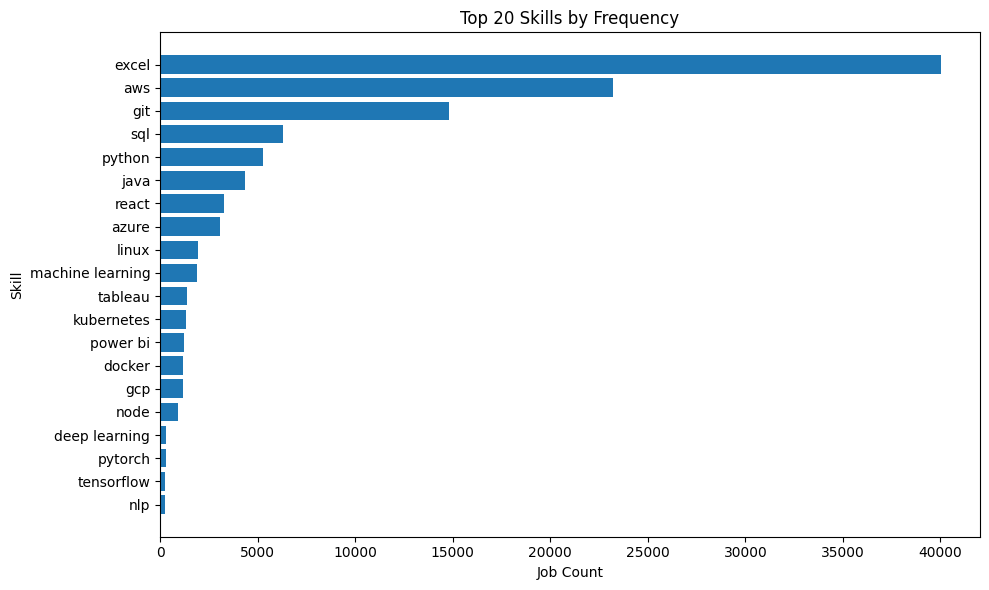

In [6]:
top_20 = skill_freq.sort_values("count", ascending=False).head(20)

plt.barh(top_20["skill"], top_20["count"])
plt.gca().invert_yaxis()
plt.title("Top 20 Skills by Frequency")
plt.xlabel("Job Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("top_20_skills.png")
plt.show()


In [8]:
combined_canonical = pd.read_csv("/content/combined_canonical_v2.csv")

/tmp/ipython-input-678525892.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_canonical = pd.read_csv("/content/combined_canonical_v2.csv")


In [9]:
total_jobs = combined_canonical["job_id"].nunique()
total_jobs


129334

In [10]:
skill_freq["percentage"] = (skill_freq["count"] / total_jobs) * 100


In [11]:
skill_freq.sort_values("percentage", ascending=False).head()


,skill,count,percentage
0,excel,40025,30.947005
1,aws,23233,17.963567
2,git,14815,11.454838
3,sql,6322,4.888119
4,python,5274,4.077814


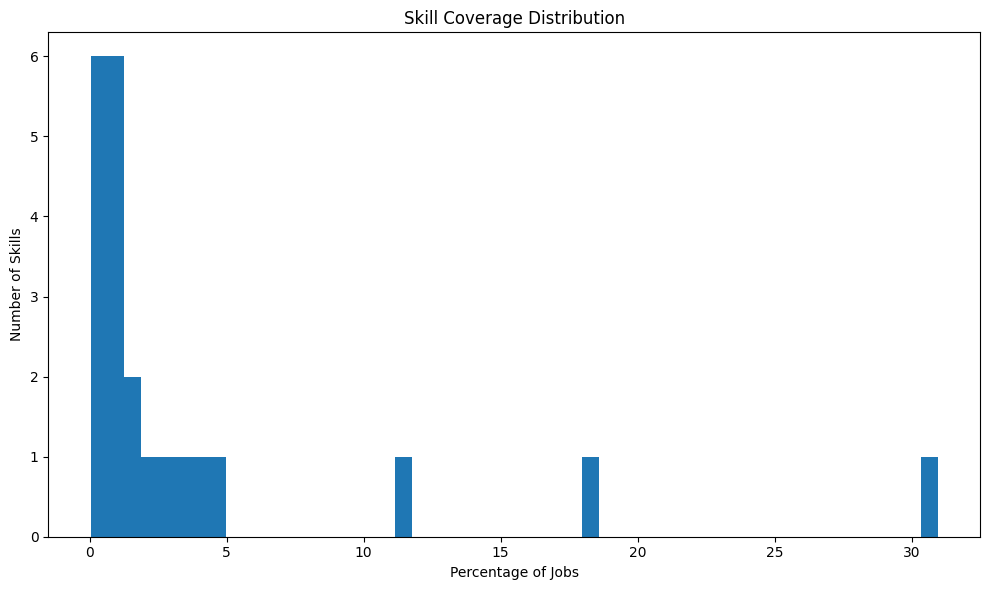

In [12]:
plt.hist(skill_freq["percentage"], bins=50)
plt.title("Skill Coverage Distribution")
plt.xlabel("Percentage of Jobs")
plt.ylabel("Number of Skills")
plt.tight_layout()
plt.savefig("skill_coverage_distribution.png")
plt.show()


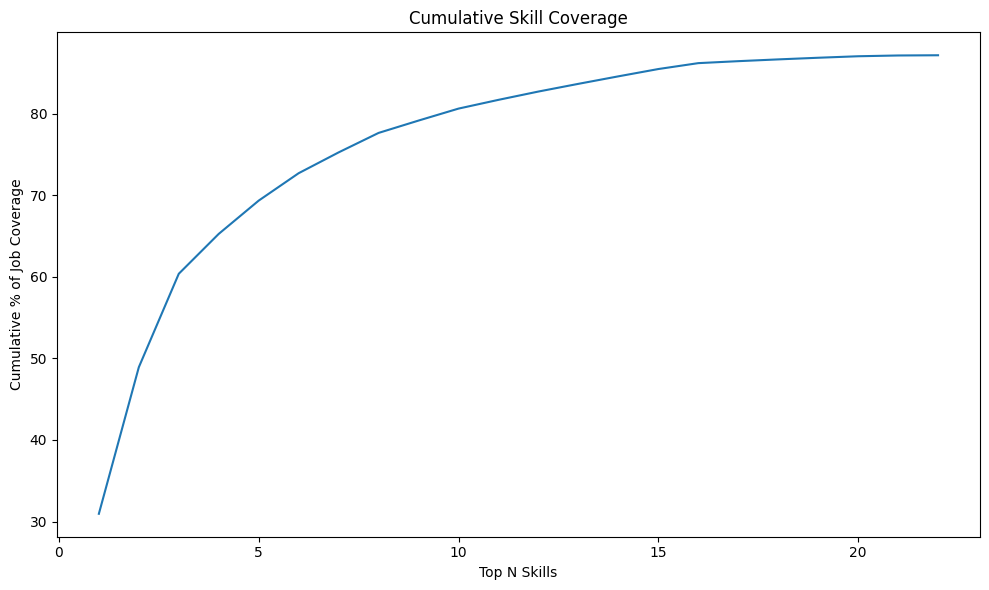

In [13]:
skill_freq_sorted = skill_freq.sort_values("percentage", ascending=False)
skill_freq_sorted["cumulative_coverage"] = skill_freq_sorted["percentage"].cumsum()

plt.plot(
    range(1, len(skill_freq_sorted) + 1),
    skill_freq_sorted["cumulative_coverage"]
)
plt.title("Cumulative Skill Coverage")
plt.xlabel("Top N Skills")
plt.ylabel("Cumulative % of Job Coverage")
plt.tight_layout()
plt.savefig("cumulative_skill_coverage.png")
plt.show()


### Interpretation

- A small number of skills dominate job postings, indicating strong market concentration.
- Skill demand is highly skewed, with most skills appearing in a very small fraction of jobs.
- The majority of skills form a long tail with limited individual impact.
- A relatively small set of core skills covers a large portion of job postings.
- Job seekers benefit more from mastering high-coverage skills than chasing niche ones.
